In [612]:
import csv
from collections import defaultdict
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics.pairwise import cosine_similarity
import sys
#base_dir = os.environ['AWEB_DIR']
sys.path.append("../../")
import config

In [613]:
def convert_keys_to_int(d):
    new_dict = {}
    for k, v in d.items():
        new_key = int(k) if k.isdigit() else k
        if isinstance(v, dict):
            new_dict[new_key] = convert_keys_to_int(v)
        else:
            new_dict[new_key] = v
    return new_dict

In [614]:
result_dir = config.OUTPUT_DIR
embeddings_dir = config.EMBEDDING_DIR
data_dir = config.DATA_DIR
print(result_dir)
with open(data_dir+'attack_weak_range.json') as fp:
    attack_weak_range = json.load(fp)
with open(data_dir+"bron_attack_cwe.json") as fp:
    bron_attack_cwe=json.load(fp)
with open(data_dir+"bron_cwe_attack.json") as fp:
    bron_cwe_attack=json.load(fp)
with open(data_dir+"rand_hit_k_1000.json") as fp:
    rand_hit_k=json.load(fp)   
with open(data_dir+"rand_hit_k_avg_1000.json") as fp:
    rand_hit_k_avg=json.load(fp)

bron_attack_cwe = convert_keys_to_int(bron_attack_cwe)
bron_cwe_attack = convert_keys_to_int(bron_cwe_attack)
rand_hit_k = convert_keys_to_int(rand_hit_k)
rand_hit_k_avg = convert_keys_to_int(rand_hit_k_avg)
attack_size=attack_weak_range['attack'][1]
weakness_size=attack_weak_range['cwe'][1]-attack_size

/home/afarhan/post-doc/AWEB_GCL/model_outputs/ics_attack/


In [615]:
mx_w = 0
for a in bron_attack_cwe:
    mx_w = max(mx_w,len(bron_attack_cwe[a]))
print("Max # weak with an Attack:", mx_w)
mx_a = 0
for w in bron_cwe_attack:
    mx_a = max(mx_a,len(bron_cwe_attack[w]))
print("Max # attack with a weakness:", mx_a)

Max # weak with an Attack: 71
Max # attack with a weakness: 22


In [616]:
result_dir

'/home/afarhan/post-doc/AWEB_GCL/model_outputs/ics_attack/'

In [617]:


#models = ["pretrained_SecBert", "SecBert_E10", "pretrained_SecureBert",  "SecureBert_E10", "pretrained_Gpt2","Gpt2"]
#models = ["pretrained_SecBert", "SecBert_E5", "pretrained_SecureBert",  "SecureBert_E5", "pretrained_Gpt2","Gpt2_E5"]
#models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
#models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2"]
#models = ["Gpt2"]
#models = ["Gpt2_E5"]
# gnn_models = ["GAN_embeddings","GAN_dual_embeddings","GAN_dual_hop_embeddings","GAN_dual_hop_loss","GCN_embeddings","GCN_dual_embeddings","GCN_dual_hop_embeddings","GCN_dual_hop_loss"]
#gnn_models = ["GAN_embeddings","GAN_dual_embeddings","GAN_dual_hop_graph","GCN_embeddings","GCN_dual_embeddings","GCN_dual_hop_graph","GAN_node2vec","GCN_node2vec"]


sample = 10
dual = "dual3"
loss_func = "triplet"
plot_dir = result_dir+"plots/sample_{}/{}/".format(sample,loss_func)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
models = ["pt_gpt2-xl", "pt_gpt2-xl"]
gnn_models = ["GCN","GAT"]
features = ["text", "text_hop", "node2vec", "deepwalk"]

threshold=(0.65,0.45)
# gnn_models = ["GAN_embeddings","GCN_embeddings"]
text_embeddings = []
our_embeddings = []
text_matrix = []
hop_matrix = []
gnn_text_matrix = []
gnn_hop_matrix = []
gnn_node2vec_matrix = []
gnn_deepwalk_matrix = []
two_margin = False
node2vec_matrix=cosine_similarity(np.load(embeddings_dir+"node2vec.npy"))
deepwalk_matrix=cosine_similarity(np.load(embeddings_dir+"deepwalk.npy"))
for model in models:
    text_emb_dir = embeddings_dir+model+"/"
    gcl_data_dir = result_dir+"gcl_data/"+model+"/"
    text_embeddings.append(np.load(text_emb_dir+"text_embeddings.npy"))
    our_embeddings.append(np.load(text_emb_dir+"text_hop_embeddings.npy"))
    
    text_matrix.append(cosine_similarity(text_embeddings[-1]))
    hop_matrix.append(cosine_similarity(our_embeddings[-1]))
    gnn_hop = []
    gnn_node2vec = []
    gnn_deepwalk = []
    gnn_text = []
    for j in range(len(gnn_models)):

        


        if(model=="gpt2-xl"):
            gnn_embeddings2=np.load(gcl_data_dir+"sample_{}/{}/{}/text_hop_{}_gm_1.0.npy".format(sample,gnn_models[j],loss_func,dual))
            gnn_hop.append(cosine_similarity(gnn_embeddings2))
            gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_node2vec_{}_gm_1.0.npy".format(sample,gnn_models[j],loss_func,dual))
            gnn_node2vec.append(cosine_similarity(gnn_embeddings3))
            gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_deepwalk_{}_gm_1.0.npy".format(sample,gnn_models[j],loss_func,dual))
            gnn_deepwalk.append(cosine_similarity(gnn_embeddings3))
        else:
            sample = 1
            dual = ""
            aug = "augment4"
            loss_func = "triplet"
            gcl_data_dir = result_dir+"gcl_data/"+"pt_gpt2-xl"+"/"
            gnn_embeddings2=np.load(gcl_data_dir+"sample_{}/{}/{}/text_hop_{}.npy".format(sample,gnn_models[j],loss_func,aug))
            gnn_hop.append(cosine_similarity(gnn_embeddings2))
            gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/node2vec_{}.npy".format(sample,gnn_models[j],loss_func,aug))
            gnn_node2vec.append(cosine_similarity(gnn_embeddings3))
            gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/deepwalk_{}.npy".format(sample,gnn_models[j],loss_func,aug))
            gnn_deepwalk.append(cosine_similarity(gnn_embeddings3))
            gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_{}.npy".format(sample,gnn_models[j],loss_func,aug))
            gnn_text.append(cosine_similarity(gnn_embeddings3))

        # else:

            # gnn_embeddings2=np.load(gcl_data_dir+"sample_{}/{}/{}/text_hop_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
            # gnn_hop.append(cosine_similarity(gnn_embeddings2))
            # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/node2vec_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
            # gnn_node2vec.append(cosine_similarity(gnn_embeddings3))
            # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/deepwalk_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
            # gnn_deepwalk.append(cosine_similarity(gnn_embeddings3))
            # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
            # gnn_text.append(cosine_similarity(gnn_embeddings3))
    
        # gnn_embeddings2.append(np.load(dir_name+"{}/sample_{}/hop_gm_1.0.npy".format(gnn_models[j],sample)))
        # gnn_emb_matrix2.append(cosine_similarity(gnn_embeddings2[-1]))
        # gnn_embeddings2.append(np.load(dir_name+"{}/sample_{}/node2vec_gm_1.0.npy".format(gnn_models[j],sample)))
        # gnn_emb_matrix2.append(cosine_similarity(gnn_embeddings2[-1]))
    # gnn_hop_matrix.append(gnn_hop)
    # gnn_node2vec_matrix.append(gnn_node2vec)
    gnn_deepwalk_matrix.append(gnn_deepwalk)
    if(model!="gpt2-xl"):
        gnn_text_matrix.append(gnn_text)
    dual = "dual3"


In [618]:

def calc_intersect(bron_attack_cwe, matrix, isAttack, isAverage):
    # Loop over each k from 10 to 1136
    average_hit_at_k = {}
    if(isAttack):
        size = attack_size
        cosine_matrix = matrix[:attack_size,attack_size:]
    else:
        size = weakness_size
        cosine_matrix = matrix[attack_size:,:attack_size]
    for k in range(5, 31,5):
        hit_at_k = []
        for i in range(size):
            # Get the indices of the top k values in the row for both matrices
            node_id =i
            if(not isAttack):
                node_id = i+attack_size
            if(node_id not in bron_attack_cwe.keys()):
                continue
            # if(len(bron_attack_cwe[i])<k):
            #     continue
            top_bron = bron_attack_cwe[node_id]
            top_k = np.argsort(cosine_matrix[i])[-k:]
            if(isAttack):
                top_k = [x+attack_size for x in top_k]
            
            # Calculate the hit@k (number of common indices in top k)
            #hit_count = len(set(top_bron) & set(top_k))
            if(isAverage):
                hit_count = len(set(top_bron) & set(top_k))/float(min(k,len(top_bron)))
            else:
                hit_count = len(set(top_bron) & set(top_k))
            
            # Append the result to the list
            hit_at_k.append(hit_count)
        # Calculate the average hit@k for the current k
        # print(hit_at_k)
        average_hit_at_k[k] = np.mean(hit_at_k)
    return average_hit_at_k

In [623]:

def plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k, text_matrix, hop_matrix, isAttack, isAverage, threshold):
    models = ["AttWeakBridge", "View Augmentation"]
    # Initialize a dictionary to store average hit@k for each k
    markers = ['o', 's', '+', 'v', '<', '>']
    colors = list(mcolors.TABLEAU_COLORS)
    colors.pop(3)
    plt.figure(figsize=(3, 3))
    # Loop over all the models
    #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
    #models = ["Gpt2"]
    hit_differ = {}
    if(isAttack):
        size = attack_size
        rand_hit_at_k = rand_hit_k['attack']
        
    else:
        size = weakness_size
        rand_hit_at_k = rand_hit_k['weak']

    hits1 = list(rand_hit_at_k.values())[:6]
    ks = list(range(5, 31,5))
    hit_differ["random"] = hits1
    
    # hits2 = list(calc_intersect(bron_attack_cwe, node2vec_matrix, isAttack, isAverage).values())
    hits3 = list(calc_intersect(bron_attack_cwe, deepwalk_matrix, isAttack, isAverage).values())
    # hit_differ["node2vec"] = hits2
    hit_differ["deepwalk"] = hits3

    plt.plot(ks, hits1, label="Random Pick", marker='x', color = 'tab:red')
    # plt.plot(ks, hits2, label="node2vec", marker='x', color = 'tab:olive')
    plt.plot(ks, hits3, label="DeepWalk", marker='x', color = 'tab:cyan')
    
    all_hits = []
    for i in range(0,len(models),1):
        # Define the cosine similarity matrices
        model = models[i]
        hits7 = list(calc_intersect(bron_attack_cwe, text_matrix[i], isAttack, isAverage).values())
        # hits8 = list(calc_intersect(bron_attack_cwe, hop_matrix[i], isAttack, isAverage).values())
        name = model+"_"
        hit_differ[name+"text"]=hits7
        # hit_differ[name+"hop_text"]=hits8
        
        for j in range(len(gnn_models)):
            # hits4 = list(calc_intersect(bron_attack_cwe, gnn_hop_matrix[i][j], isAttack, isAverage).values())
            # hits5 = list(calc_intersect(bron_attack_cwe, gnn_node2vec_matrix[i][j], isAttack, isAverage).values())            # if(j==2 or j==5):
            hits6 = list(calc_intersect(bron_attack_cwe, gnn_deepwalk_matrix[i][j], isAttack, isAverage).values()) 
            name = model+"_"+gnn_models[j]+"_"
            # hit_differ[name+"hop_text"]=hits4
            # hit_differ[name+"node2vec"]=hits5
            hit_differ[name+"deepwalk"]=hits6
            if(model=="View Augmentation"):
                hits9 = list(calc_intersect(bron_attack_cwe, gnn_text_matrix[0][j], isAttack, isAverage).values()) 
                hit_differ[name+"text"]=hits9
            # plt.plot(ks, hits4, label=models[i]+" "+gnn_models[j] +" hop", marker="*", color = colors[j+i*5])
            # plt.plot(ks, hits5, label=models[i]+" "+gnn_models[j]+ " node2vec", marker="s", color = colors[j+i*5])
            plt.plot(ks, hits6, label=models[i]+" "+gnn_models[j]+ " DeepWalk", marker="p", color = colors[j+i*5])
            if(model=="View Augmentation"):
                plt.plot(ks, hits9, label=models[i]+" "+gnn_models[j]+ " Text", marker="|", color = colors[j+i*5])
        

        
        if(i==0):
            cl1 = "tab:green"
            # plt.plot(ks, hits7, label=models[i]+" Text emb", marker='.', color = cl1)
        else:
            cl1 = "tab:purple"
        
        # plt.plot(ks, hits8, label=models[i]+" Hop emb", marker='v', color = cl1)
        


    plt.xlabel('K')
    plt.ylabel('Average Precision@k')
    plt.xticks(ks)
    plt.grid(True)
    plt.legend(fontsize="10",bbox_to_anchor=(1.1, 1.05))
    #plt.title('GNN Semi Supervised - Text - Hop Embeddings')
    
    if(isAttack):
        if(isAverage):
            #plt.title('Bron-GNN-{} Avg Hit@k Attack to Weakness'.format(dual))
            #title = "avg_bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
            title = "avg_bron_hit@k_gnn_{}_sample_{}.png".format(dual,sample)
        else:
            #plt.title('Bron-GNN Hit@k Attack to Weakness')
            # title = "bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
            title = "bron_hit@k_gnn_{}_sample_{}.png".format(dual,sample)
    # else:
    #     if(isAverage):
    #         plt.title('Bron-GNN-dual Avg Hit@k Weakness to Attack')
    #         title = "avg_bron_hit@k_gnn_dual_sample_{}_weak_attack.png".format(sample)
    #     else:
    #         plt.title('Bron-GNN Hit@k Weakness to Attack')
    #         title = "bron_hit@k_gnn_sample_{}_weak_attack.png".format(sample)
    print(plot_dir+title)
    plt.savefig(plot_dir+title, dpi=300, bbox_inches='tight')
    plt.show()
    return hit_differ

/home/afarhan/post-doc/AWEB_GCL/model_outputs/ics_attack/plots/sample_10/triplet/bron_hit@k_gnn_dual3_sample_1.png


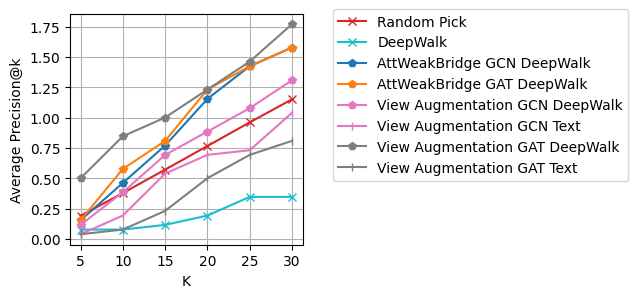

{'random': [0.19042307692307694,
  0.3777307692307692,
  0.5708846153846154,
  0.7656153846153845,
  0.9602692307692308,
  1.1500769230769232],
 'deepwalk': [0.07692307692307693,
  0.07692307692307693,
  0.11538461538461539,
  0.19230769230769232,
  0.34615384615384615,
  0.34615384615384615],
 'AttWeakBridge_text': [0.23076923076923078,
  0.5769230769230769,
  0.8461538461538461,
  1.1538461538461537,
  1.2307692307692308,
  1.3846153846153846],
 'AttWeakBridge_GCN_deepwalk': [0.15384615384615385,
  0.46153846153846156,
  0.7692307692307693,
  1.1538461538461537,
  1.4230769230769231,
  1.5769230769230769],
 'AttWeakBridge_GAT_deepwalk': [0.15384615384615385,
  0.5769230769230769,
  0.8076923076923077,
  1.2307692307692308,
  1.4230769230769231,
  1.5769230769230769],
 'View Augmentation_text': [1.2307692307692308,
  1.6538461538461537,
  1.8846153846153846,
  2.1538461538461537,
  2.3076923076923075,
  2.5],
 'View Augmentation_GCN_deepwalk': [0.11538461538461539,
  0.384615384615384

In [624]:
plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k, text_matrix,hop_matrix, True, False, threshold)

IndexError: list index out of range

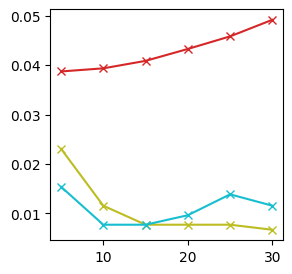

In [620]:
attack_weak_hit_differ = plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k_avg, text_matrix,hop_matrix, True, True, threshold)

In [611]:
attack_weak_hit_differ

{'random': [0.03874115384615385,
  0.03937615384615385,
  0.04088905086366626,
  0.04330076949225988,
  0.045854020545693625,
  0.04921214248998865],
 'node2vec': [0.02307692307692308,
  0.01153846153846154,
  0.007692307692307693,
  0.007692307692307693,
  0.007692307692307693,
  0.006666666666666667],
 'deepwalk': [0.015384615384615385,
  0.007692307692307693,
  0.007692307692307693,
  0.009615384615384616,
  0.013846153846153848,
  0.011538461538461537],
 'AttWeakBridge_text': [0.24615384615384614,
  0.16623931623931623,
  0.13263403263403264,
  0.11837121212121213,
  0.10627331002331004,
  0.10088869463869463],
 'AttWeakBridge_GCN_node2vec': [0.12307692307692308,
  0.07350427350427349,
  0.0693084693084693,
  0.12948232323232325,
  0.13858100233100235,
  0.13499125874125875],
 'AttWeakBridge_GCN_deepwalk': [0.10000000000000002,
  0.11581196581196583,
  0.11717171717171718,
  0.14486693861693864,
  0.1447348484848485,
  0.14708736776044468],
 'AttWeakBridge_GAT_node2vec': [0.1076923

In [558]:
weakness_hop_sim_matrix = np.load(data_dir+'weakness_hop_sim_matrix.npy')
attack_hop_sim_matrix = np.load(data_dir+'attack_hop_sim_matrix.npy')

In [397]:
from scipy.stats import spearmanr
# Flatten the matrices

def get_spearman_rank_corr_graph(matrix1, matrix2, isAttack):
    cosine_matrix1 = matrix1
    if isAttack:
        cosine_matrix2 = matrix2[:attack_size, :attack_size]
    else:
        cosine_matrix2 = matrix2[attack_size:, attack_size:]

    avg_spearman_corr_list = []
    spearman_corrs_all_k = []
    for i in range(len(cosine_matrix1)):
        # Compute ranks for both arrays
        ranks1 = np.argsort(np.argsort(-cosine_matrix1[i]))
        ranks2 = np.argsort(np.argsort(-cosine_matrix2[i]))
        spearman_corr_list = []
        for k in range(5, 30, 5):
            # Compute Spearman's rank correlation
            spearman_corr, _ = spearmanr(ranks1[:k], ranks2[:k])
            spearman_corr_list.append(spearman_corr)
        
        spearman_corrs_all_k.append(spearman_corr_list)

    # Transpose the list of lists to get correlations for each k across all rows
    spearman_corrs_all_k = np.array(spearman_corrs_all_k).T

    # Calculate the average Spearman rank correlation for each k
    avg_spearman_corr = [np.mean(k_corrs) for k_corrs in spearman_corrs_all_k]
    
    return avg_spearman_corr

In [372]:
get_spearman_rank_corr_graph(attack_hop_sim_matrix,deepwalk_matrix, True)

[0.7118226600985221,
 0.6129571577847439,
 0.6783603096410978,
 0.6703507537316198,
 0.6629897688518379]

In [420]:
def generate_src_hit_k(attack_hop_sim_matrix, isAttack):
    attack_graph_src = {}
    text_gnn_src_list = []
    text_hop_gnn_src_list = []
    node2vec_gnn_src_list = []
    deepwalk_gnn_src_list = []
    text_src = []
    text_hop_src = []
    for i,model in enumerate(models):
        
        # print("Model: ", model)
        text_gnn_src = []
        text_hop_gnn_src = []
        node2vec_gnn_src = []
        deepwalk_gnn_src = []
        for j in range(len(gnn_models)):
            spearman_corr = get_spearman_rank_corr(attack_hop_sim_matrix,gnn_text_matrix[i][j])
            text_gnn_src.append(spearman_corr)
            spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,gnn_hop_matrix[i][j], isAttack)
            text_hop_gnn_src.append(spearman_corr)
            spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,gnn_node2vec_matrix[i][j], isAttack)
            node2vec_gnn_src.append(spearman_corr)
            spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,gnn_deepwalk_matrix[i][j], isAttack)
            deepwalk_gnn_src.append(spearman_corr)
        text_gnn_src_list.append(text_gnn_src)
        text_hop_gnn_src_list.append(text_hop_gnn_src)
        node2vec_gnn_src_list.append(node2vec_gnn_src)
        deepwalk_gnn_src_list.append(deepwalk_gnn_src)
        spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,text_matrix[i], isAttack)
        text_src.append(spearman_corr)
        # print("\tText Embedding: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,hop_matrix[i], isAttack)
        text_hop_src.append(spearman_corr)
        # print("\tHop Embedding ", spearman_corr)
        
    node2vec_src = get_spearman_rank_corr_graph(attack_hop_sim_matrix,node2vec_matrix, isAttack)
    # print("Node2vec Embedding: ", spearman_corr)
    deepwalk_src = get_spearman_rank_corr_graph(attack_hop_sim_matrix,deepwalk_matrix, isAttack)
    # print("Deepwalk Embedding ", spearman_corr)
    attack_graph_src["text_gnn"]=text_gnn_src_list
    attack_graph_src["text_hop_gnn"]=text_hop_gnn_src_list
    attack_graph_src["node2vec_gnn"]=node2vec_gnn_src_list
    attack_graph_src["deepwalk_gnn"]=deepwalk_gnn_src_list
    attack_graph_src["text"]=text_src
    attack_graph_src["text_hop"]=text_hop_src
    attack_graph_src["node2vec"]=node2vec_src
    attack_graph_src["deepwalk"]=deepwalk_src
    return attack_graph_src

In [421]:
attack_graph_src= generate_src_hit_k(attack_hop_sim_matrix, True)

In [422]:
weakness_graph_src= generate_src_hit_k(weakness_hop_sim_matrix, False)

In [423]:
attack_graph_src["text_hop"]

[[0.24384236453201966,
  0.19301388266905503,
  0.2437543983110485,
  0.22617133967924738,
  0.23484653277756729],
 [0.19408866995073887,
  0.24848484848484848,
  0.28828289936664314,
  0.3062631949331457,
  0.31095111784766954]]

In [449]:
def plot_SRC_K(graph_src, _type):
    dual = ""
    # Initialize a dictionary to store average hit@k for each k
    markers = ['o', 's', '+', 'v', '<', '>']
    colors = list(mcolors.TABLEAU_COLORS)
    colors.pop(3)
    plt.figure(figsize=(5, 5))
    ks = list(range(5, 30, 5))
    if(_type!="text"):
        hits2 = graph_src["node2vec"]
        hits3 = graph_src["deepwalk"]
                
        plt.plot(ks, hits2, label="node2vec", marker='x', color = 'tab:olive')
        plt.plot(ks, hits3, label="deeplwalk", marker='x', color = 'tab:cyan')


    # plt.plot(ks, hits1, label="Random Pick", marker='x', color = 'tab:red')
    all_hits = []
    for i in range(0,len(models),1):
        # Define the cosine similarity matrices
        model = models[i]
        if(_type=="text"):
            if(i==0):
                mrk='x'
            else:
                mrk='P'
            hits2 = graph_src["node2vec"][i]
            hits3 = graph_src["deepwalk"][i]
                    
            plt.plot(ks, hits2, label=model+" node2vec", marker=mrk, color = 'tab:olive')
            plt.plot(ks, hits3, label=model+" deeplwalk", marker=mrk, color = 'tab:cyan')
        for j in range(len(gnn_models)):
            hits4 = graph_src["text_hop_gnn"][i][j]
            
            hits5 = graph_src["node2vec_gnn"][i][j]
           
            hits6 =  graph_src["deepwalk_gnn"][i][j]
            if(dual==""):
                 
                hits9 = graph_src["text_gnn"][i][j]
            plt.plot(ks, hits4, label=models[i]+" "+gnn_models[j] +" hop", marker="*", color = colors[j+i*5])
            plt.plot(ks, hits5, label=models[i]+" "+gnn_models[j]+ " node2vec", marker="s", color = colors[j+i*5])
            plt.plot(ks, hits6, label=models[i]+" "+gnn_models[j]+ " deepwalk", marker="p", color = colors[j+i*5])
            if(dual==""):
                plt.plot(ks, hits9, label=models[i]+" "+gnn_models[j]+ " text", marker="|", color = colors[j+i*5])
        
        hits7 = graph_src["text"][i]
        hits8 = graph_src["text_hop"][i]
        
        if(i==0):
            cl1 = "tab:green"
        else:
            cl1 = "tab:purple"
        plt.plot(ks, hits7, label=models[i]+" Text emb", marker='.', color = cl1)
        plt.plot(ks, hits8, label=models[i]+" Hop emb", marker='v', color = cl1)



    plt.xlabel('K')
    plt.ylabel('Average Hit@k')
    plt.xticks(ks)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    #plt.title('GNN Semi Supervised - Text - Hop Embeddings')
    
    if(_type=="attack"):
        
        plt.title('Attack Graph-GNN-{} SRC@k'.format(dual))
        #title = "avg_bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
        title = "Attack_SRC@k_gnn_{}_sample_{}.png".format(dual,sample)
    elif(_type=="weak"):
        plt.title('CWE Graph-GNN-{} SRC@k'.format(dual))
        #title = "avg_bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
        title = "CWE_SRC@k_gnn_{}_sample_{}.png".format(dual,sample)
    else:
        plt.title('Text GNN-{} SRC@k'.format(dual))
        #title = "avg_bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
        title = "Text_SRC@k_gnn_{}_sample_{}.png".format(dual,sample)
    # else:
    #     if(isAverage):
    #         plt.title('Bron-GNN-dual Avg Hit@k Weakness to Attack')
    #         title = "avg_bron_hit@k_gnn_dual_sample_{}_weak_attack.png".format(sample)
    #     else:
    #         plt.title('Bron-GNN Hit@k Weakness to Attack')
    #         title = "bron_hit@k_gnn_sample_{}_weak_attack.png".format(sample)
            
    plt.savefig(plot_dir+title, dpi=300, bbox_inches='tight')
    plt.show()

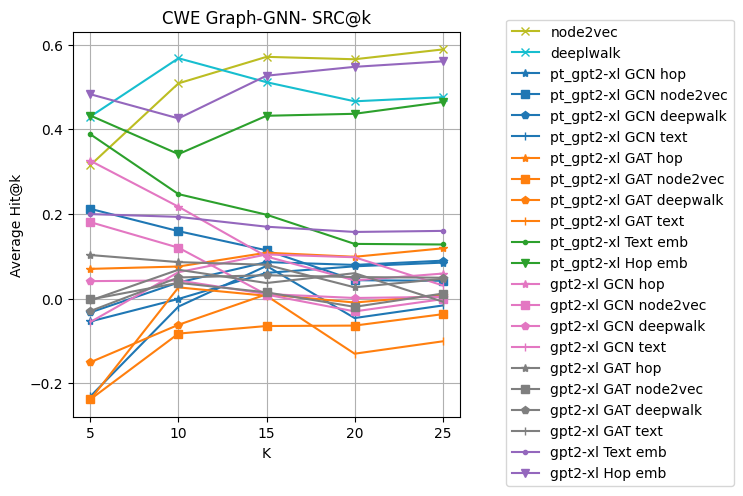

In [436]:
plot_SRC_K(weakness_graph_src, "weak")

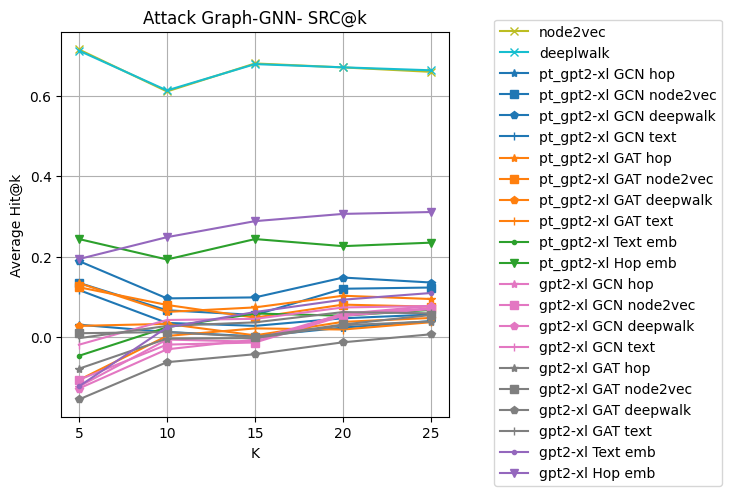

In [448]:
plot_SRC_K(attack_graph_src, "attack")

In [380]:
from scipy.stats import spearmanr
# Flatten the matrices
def get_spearman_rank_corr_text(matrix1,matrix2):

    avg_spearman_corr_list = []
    spearman_corrs_all_k = []
    for i in range(len(matrix1)):
        # Compute ranks for both arrays
        ranks1 = np.argsort(np.argsort(-matrix1[i]))
        ranks2 = np.argsort(np.argsort(-matrix2[i]))
        spearman_corr_list = []
        for k in range(5, 30, 5):
            # Compute Spearman's rank correlation
            spearman_corr, _ = spearmanr(ranks1[:k], ranks2[:k])
            spearman_corr_list.append(spearman_corr)
        
        spearman_corrs_all_k.append(spearman_corr_list)

    # Transpose the list of lists to get correlations for each k across all rows
    spearman_corrs_all_k = np.array(spearman_corrs_all_k).T

    # Calculate the average Spearman rank correlation for each k
    avg_spearman_corr = [np.mean(k_corrs) for k_corrs in spearman_corrs_all_k]

    return avg_spearman_corr

In [438]:
def generate_src_hit_k_text():
    text_graph_src = {}
    text_gnn_src_list = []
    text_hop_gnn_src_list = []
    node2vec_gnn_src_list = []
    deepwalk_gnn_src_list = []
    text_src = []
    text_hop_src = []
    node2vec_src=[]
    deepwalk_src=[]
    for i,model in enumerate(models):
        print("Model: ", model)
        text_gnn_src = []
        hop_gnn_src = []
        node2vec_gnn_src = []
        deepwalk_gnn_src = []
        for j in range(len(gnn_models)):
            print("\tGNN: ", gnn_models[j])
            # gnn_hop_matrix.append(gnn_hop)
            # gnn_node2vec_matrix.append(gnn_node2vec)
            # gnn_deepwalk_matrix.append(gnn_deepwalk)
            spearman_corr = get_spearman_rank_corr_text(text_matrix[i],gnn_text_matrix[i][j])
            text_gnn_src.append(spearman_corr)
            spearman_corr = get_spearman_rank_corr_text(text_matrix[i],gnn_hop_matrix[i][j])
            hop_gnn_src.append(spearman_corr)
            spearman_corr = get_spearman_rank_corr_text(text_matrix[i],gnn_node2vec_matrix[i][j])
            node2vec_gnn_src.append(spearman_corr)
            spearman_corr = get_spearman_rank_corr_text(text_matrix[i],gnn_deepwalk_matrix[i][j])
            deepwalk_gnn_src.append(spearman_corr)
        text_gnn_src_list.append(text_gnn_src)
        text_hop_gnn_src_list.append(hop_gnn_src)
        node2vec_gnn_src_list.append(node2vec_gnn_src)
        deepwalk_gnn_src_list.append(deepwalk_gnn_src)
        spearman_corr = get_spearman_rank_corr_text(text_matrix[i],text_matrix[i])
        text_src.append(spearman_corr)
        spearman_corr = get_spearman_rank_corr_text(text_matrix[i],hop_matrix[i])
        text_hop_src.append(spearman_corr)
        spearman_corr = get_spearman_rank_corr_text(text_matrix[i],node2vec_matrix)
        node2vec_src.append(spearman_corr)
        spearman_corr = get_spearman_rank_corr_text(text_matrix[i],deepwalk_matrix)
        deepwalk_src.append(spearman_corr)
    text_graph_src["text_gnn"]=text_gnn_src_list
    text_graph_src["text_hop_gnn"]=text_hop_gnn_src_list
    text_graph_src["node2vec_gnn"]=node2vec_gnn_src_list
    text_graph_src["deepwalk_gnn"]=deepwalk_gnn_src_list
    text_graph_src["text"]=text_src
    text_graph_src["text_hop"]=text_hop_src
    text_graph_src["node2vec"]=node2vec_src
    text_graph_src["deepwalk"]=deepwalk_src
    return text_graph_src


In [439]:
text_graph_src = generate_src_hit_k_text()

Model:  pt_gpt2-xl
	GNN:  GCN
	GNN:  GAT
Model:  gpt2-xl
	GNN:  GCN
	GNN:  GAT


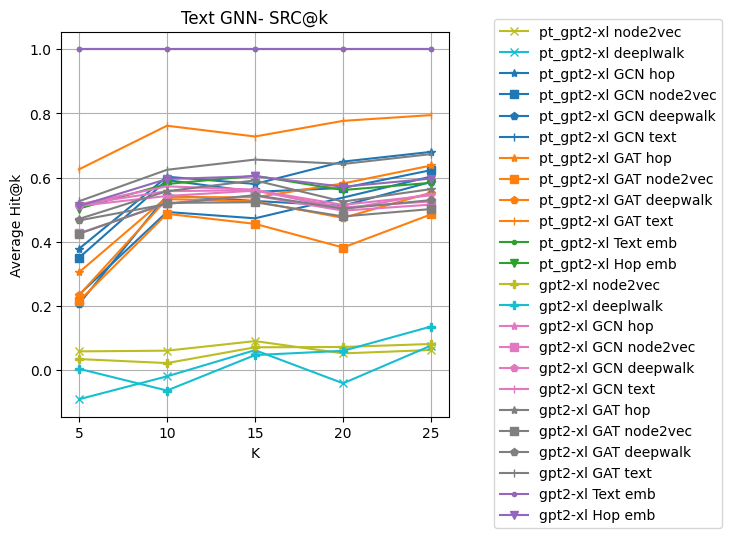

In [450]:
plot_SRC_K(text_graph_src, "text")

In [ ]:
# Model:  pt_gpt2-xl
# 	GNN:  GCN
# 		Text-Hop:  0.5763740245208365
# 		Node2vec:  0.474097403309271
# 		Deepwalk:  0.4789984276171688
# 	GNN:  GAT
# 		Text-Hop:  0.6303656880113256
# 		Node2vec:  0.5616786255630906
# 		Deepwalk:  0.5606473439948815
# 	Text Embedding:  1.0
# 	Hop Embedding  0.7008013464659447
# Node2vec Embedding:  0.4513213738715633
# Deepwalk Embedding  0.15821678731865835
# Model:  gpt2-xl
# 	GNN:  GCN
# 		Text-Hop:  0.5770128934351003
# 		Node2vec:  0.486027615952666
# 		Deepwalk:  0.5048567652479259
# 	GNN:  GAT
# 		Text-Hop:  0.6037483876369719
# 		Node2vec:  0.5569079939584686
# 		Deepwalk:  0.5724040887787627
# 	Text Embedding:  0.9999999999999998
# 	Hop Embedding  0.7238500442717044
# Node2vec Embedding:  0.45558089268326263
# Deepwalk Embedding  0.1408571580014379

In [ ]:


# #models = ["pretrained_SecBert", "SecBert_E10", "pretrained_SecureBert",  "SecureBert_E10", "pretrained_Gpt2","Gpt2"]
# models = ["pretrained_SecBert", "SecBert_E5", "pretrained_SecureBert",  "SecureBert_E5", "pretrained_Gpt2","Gpt2_E5"]
# #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
# #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2"]
# #models = ["Gpt2"]
# #models = ["pretrained_Gpt2","Gpt2_E5"]
# text_embeddings = []
# our_embeddings = []
# text_matrix = []
# our_emb_matrix = []
# for model in models:
#     text_embeddings.append(np.load(dir_name+model+"/data/all_embeddings.npy"))
#     our_embeddings.append(np.load(dir_name+model+"/data/our_embeddings.npy"))
#     text_matrix.append(cosine_similarity(text_embeddings[-1]))
#     our_emb_matrix.append(cosine_similarity(our_embeddings[-1]))


In [ ]:

# def plot_hit_k_graph(bron_attack_cwe,hop_matrices, text_matrices, isAttack):
    
#     # Initialize a dictionary to store average hit@k for each k
    
#     plt.figure(figsize=(5, 5))
#     # Loop over all the models
#     #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
#     #models = ["Gpt2"]
#     markers = ['o', 's', '^', 'v', '<', '>']
#     colors = list(mcolors.TABLEAU_COLORS)
#     if(isAttack):
#         size = attack_size
#     else:
#         size = weakness_size
#     all_hits = []
#     max_bron_weak=0
#     for j in range(0,len(models),1):
#         # Define the cosine similarity matrices
#         model = models[j]
#         if(isAttack):
#             hop_matrix = hop_matrices[j][:attack_size,attack_size:]
#             text_matrix = text_matrices[j][:attack_size,attack_size:]
#         else:
#             hop_matrix = hop_matrices[j][attack_size:,:attack_size]
#             text_matrix = text_matrices[j][attack_size:,:attack_size]
#         # Loop over each k from 10 to 1136
#         average_hit_with_hop = {}
#         average_hit_with_text = {}
#         # # Plot the results
#         average_hit_with_hop = calc_intersect(bron_attack_cwe, hop_matrix, isAttack)
#         average_hit_with_text = calc_intersect(bron_attack_cwe, text_matrix, isAttack)
#         #print(average_hit_with_hop)
#         ks = list(average_hit_with_hop.keys())
#         avg_hit_with_hop_val = list(average_hit_with_hop.values())
#         avg_hit_with_text_val = list(average_hit_with_text.values())
#         plt.plot(ks, avg_hit_with_text_val, label=model+" Text emb", marker='.', color = colors[j])
#         plt.plot(ks, avg_hit_with_hop_val, label=model+" Hop emb", marker='v',color = colors[j])
#     print(max_bron_weak)
#     plt.xlabel('k')
#     plt.ylabel('Average Hit@k')
#     plt.xticks(ks)
#     plt.grid(True)
#     plt.legend(bbox_to_anchor=(1.0, 1.0))
#     #plt.legend(loc="upper left")
#     if(isAttack):
#         plt.title('Average Hit@k Attack to Weakness')
#     else:
#         plt.title('Average Hit@k Weakness to Attack')
#     if(isAttack):
#         if(isAverage):
#             title = "avg_bron_hit@k_with_text_hop_attack_to_weak.png"
#         else:
#             title = "bron_hit@k_with_text_hop_attack_to_weak.png"
#     else:
#         if(isAverage):
#             title = "avg_bron_hit@k_with_text_hop_weak_to_attack.png"
#         else:
#             title = "bron_hit@k_with_text_hop_weak_to_attack.png"
#     plt.savefig(plot_dir+title, dpi=300, bbox_inches='tight')
#     plt.show()